In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing imdb data
imdb_sent = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', '\t', header=None)
imdb_sent.columns = ['text', 'sentiment']

In [4]:
#identifying key words for bad reviews
keywords = ['worst', 'slow', 'boring', 'bored', 
            'bad', 'awful', 'terrible', 'waste',
           'negative', 'walked out', 'lacks', 'flat',
           'problem', 'below average', 'long', 'little',
           'aimless', 'predictable', 'insulting', 'avoid',
           'hard to watch', 'annoying', 'annoyed', 'annoyingly',
           'boredom', 'crap', 'bs', 'crazy', 'unbelievable', 
           'disapprove', 'disgusted', 'disgust', 'embarrassing',
           'embarrass', 'god-awful', 'hate', 'hated', 'horrid',
           'idiots', 'idiot', 'ill-advised', 'ill-conceived', 
           'implausible', 'impossible', 'inaccurate', 'infuriate',
           'junk', 'lack', 'lacked', 'lame', 'mad', 'miss',
           'offend', 'offended', 'overdone', 'overplayed', 
           'retard', 'retarded', 'rotten', 'shit', 'silly', 
           'slow-moving', 'stink', 'stunk', 'sub-par', 'tank',
           'tanked', 'trash', 'unhappy', 'upset', 'one-dimensional',
           "can't recommend"]

#creating columns to identify if keyword in review
for key in keywords:
    imdb_sent[str(key)] = imdb_sent.text.str.contains(
        str(key), 
        case=False
    )

__Feature Engineering and Selection Process:__
In selecting these keywords as features in this model, I first brainstormed whatever words I could think of that could describe the latest bad movies I'd seen.  This yielded only a 50% correct labeling.  I then turned to google to identify more words that would describe bad movies.  I chose ones that I had seen in bad movie reviews in the past. 

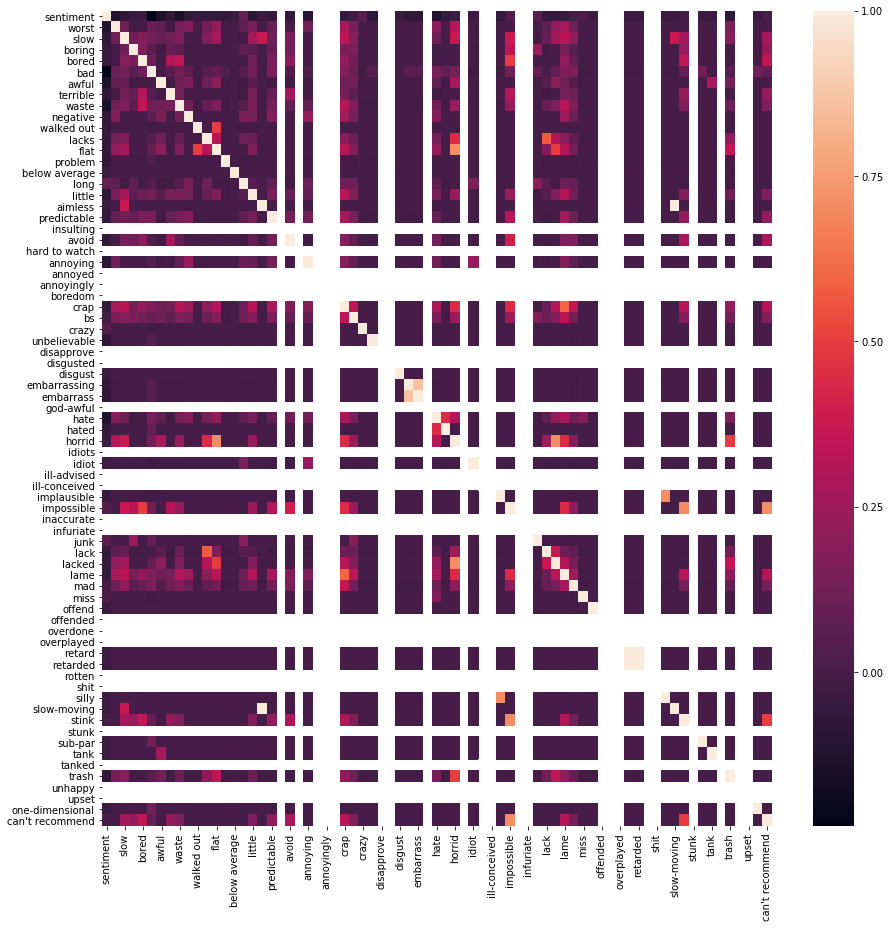

In [5]:
#plotting heatmap to ensure independence
plt.figure(figsize=(15, 15))
sns.heatmap(imdb_sent.corr())

In [6]:
#identifying x and y values
data = imdb_sent[keywords]
target = imdb_sent['sentiment']

In [7]:
from sklearn.naive_bayes import BernoulliNB

#initializing NB
bnb = BernoulliNB()
#fitting data
bnb.fit(data, target)
#classifying same data
y_pred = bnb.predict(data)

print('Number of mislabeled points out of a total {} points: {}'.format(
     data.shape[0],
     (target != y_pred).sum()
))
#percent mislabeled
print((100 * ((target != y_pred).sum()) /data.shape[0]), '%')

Number of mislabeled points out of a total 748 points: 220
29.41176470588235 %


In [8]:
#Repeating process for Yelp Data
yelp_sent = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', '\t', header=None)
yelp_sent.columns = ['text', 'sentiment']

for key in keywords:
    yelp_sent[str(key)] = yelp_sent.text.str.contains(
        str(key), 
        case=False
    )
    
yelp_data = yelp_sent[keywords]
yelp_target = yelp_sent['sentiment']

In [9]:
bnb = BernoulliNB()

bnb.fit(yelp_data, yelp_target)

y_pred_yelp = bnb.predict(yelp_data)

print('Number of mislabeled points out of a total {} points: {}'.format(
    yelp_data.shape[0], 
    (yelp_target != y_pred_yelp).sum()
))
print((100 * ((yelp_target != y_pred_yelp).sum()) /yelp_data.shape[0]), '%')

Number of mislabeled points out of a total 1000 points: 412
41.2 %


In [10]:
#Repeating with Amazon data
amazon_sent = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', '\t', header=None)
amazon_sent.columns = ['text', 'sentiment']

for key in keywords:
    amazon_sent[str(key)] = amazon_sent.text.str.contains(
        str(key), 
        case=False
    )
    
amazon_data = amazon_sent[keywords]
amazon_target = amazon_sent['sentiment']

In [11]:
bnb = BernoulliNB()

bnb.fit(amazon_data, amazon_target)

y_pred_amazon = bnb.predict(amazon_data)

print('Number of mislabeled points out of a total {} points: {}'.format(
    amazon_data.shape[0], 
    (amazon_target != y_pred_amazon).sum()
))
print((100 * ((amazon_target != y_pred_amazon).sum()) /amazon_data.shape[0]), '%')

Number of mislabeled points out of a total 1000 points: 414
41.4 %


The features used in this model were 10% less accurate at predicting the sentiment for data that was translated from other contexts. 